<a href="https://colab.research.google.com/github/Amine-dd/CNN/blob/master/basicANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.


In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  5 16:09:03 2020

@author: amino
"""

#data 
NUM_CLASSES = 10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)
#architecture
#functional API
input_layer = Input((32,32,3))
x=Flatten()(input_layer)
x=Dense(200,activation='relu')(x)
x=Dense(150,activation='relu')(x)
output_layer= Dense(NUM_CLASSES,activation='softmax')(x)
model = Model(input_layer,output_layer)
model.summary()
#train
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_11 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10





50000/50000 [==============================] - 18s 353us/step - loss: 1.8422 - acc: 0.3355
Epoch 2/10
5

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 72us/step


[1.4052701608657836, 0.4978]

In [0]:
#not a good accuracy at all it's expected while we did not use convNets

#not a good accuracy at all it's expected while we did not use convNets

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

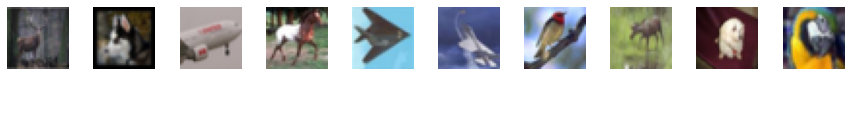

In [11]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes,color='white') 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes,color='white')
    ax.imshow(img)